In [2]:
import numpy as np
import scipy as sp
import scipy.integrate as spi
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## (1) Plot the graph of the potential.

In [3]:
def V(x):
    return((1/4)*x**4-(1/6)*x**3-(1/2)*x**2)

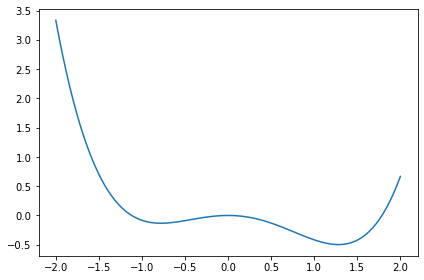

In [4]:
x=np.linspace(-2,2,100)
y=V(x)
plt.plot(x,y)

plt.tight_layout()
plt.show()

### The potential has two minimizers, one at -0.847 and one at 1.180, which is the global minimizer.

## (2) Approximation of the density.

In [5]:
sig=0.5
f=lambda x: np.exp(-2*V(x)/sig**2)
x=np.linspace(-3,3,50)
print(spi.quad(f,1,1.5)[0]/spi.quad(f,-5,5)[0])

0.6537491931001044


## (3) Code Euler scheme.

In [6]:
def dV(x):
    return(x**3-(1/2)*x**2-x)

In [7]:
from scipy.stats import norm

def EulerScheme(sig,X0,n):
    X=X0
    t=0
    compt=0
    alea=norm.rvs(size=n)
    for k in range(n):
        t=t+(k+1)**(-.55)
        X=X-(k+1)**(-.55)*dV(X)+sig*np.sqrt((k+1)**(-.55))*alea[k]
        compt=compt+(1<X and X<1.5)*(k+1)**(-.55)
    S=(1/t)*compt
    return(X,S)

## (4) Plot realizations of Euler scheme.

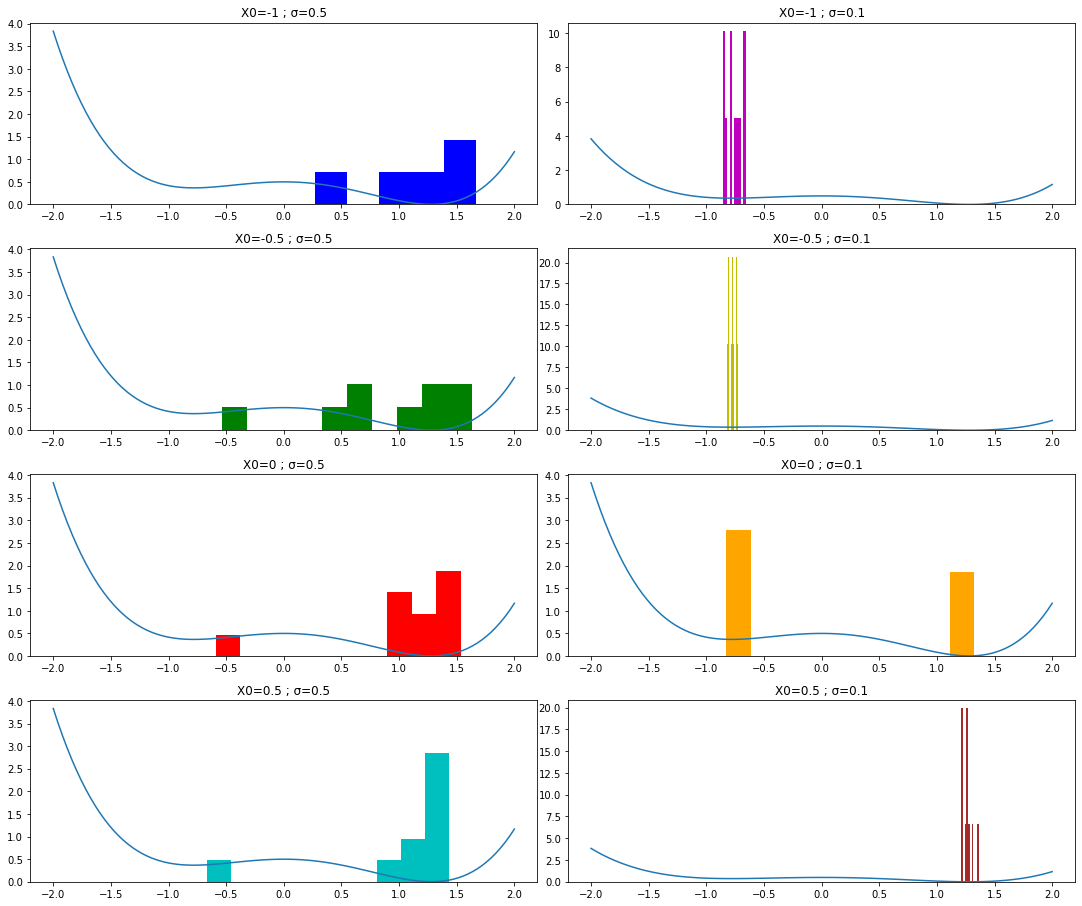

In [48]:
ini1=-1 ; ini2=-0.5 ; ini3=0 ; ini4=0.5
sigma_low=0.1 ; sigma_high=0.5
a=np.zeros(10)
b=np.zeros(10)
c=np.zeros(10)
d=np.zeros(10)
e=np.zeros(10)
f=np.zeros(10)
g=np.zeros(10)
h=np.zeros(10)
for i in range(10):
    a[i]=EulerScheme(sigma_high,ini1,1000000)[0]
    b[i]=EulerScheme(sigma_high,ini2,1000000)[0]
    c[i]=EulerScheme(sigma_high,ini3,1000000)[0]
    d[i]=EulerScheme(sigma_high,ini4,1000000)[0]
    e[i]=EulerScheme(sigma_low,ini1,1000000)[0]
    f[i]=EulerScheme(sigma_low,ini2,1000000)[0]
    g[i]=EulerScheme(sigma_low,ini3,1000000)[0]
    h[i]=EulerScheme(sigma_low,ini4,1000000)[0]

x=np.linspace(-2,2,100)
y=V(x)+0.5   

plt.figure(figsize=(15,25))

plt.subplot(8,2,1)
plt.plot(x,y)
plt.hist(a,density=True,color='b')
plt.title(f"X0={ini1} ; σ={sigma_high}")
plt.subplot(8,2,3)
plt.hist(b,density=True,color='g')
plt.plot(x,y)
plt.title(f"X0={ini2} ; σ={sigma_high}")
plt.subplot(8,2,5)
plt.hist(c,density=True,color='r')
plt.plot(x,y)
plt.title(f"X0={ini3} ; σ={sigma_high}")
plt.subplot(8,2,7)
plt.hist(d,density=True,color='c')
plt.plot(x,y)
plt.title(f"X0={ini4} ; σ={sigma_high}")
plt.subplot(8,2,2)
plt.hist(e,density=True,color='m')
plt.plot(x,y)
plt.title(f"X0={ini1} ; σ={sigma_low}")
plt.subplot(8,2,4)
plt.hist(f,density=True,color='y')
plt.plot(x,y)
plt.title(f"X0={ini2} ; σ={sigma_low}")
plt.subplot(8,2,6)
plt.hist(g,density=True,color='orange')
plt.plot(x,y)
plt.title(f"X0={ini3} ; σ={sigma_low}")
plt.subplot(8,2,8)
plt.hist(h,density=True,color='brown')
plt.plot(x,y)
plt.title(f"X0={ini4} ; σ={sigma_low}")

plt.tight_layout()
plt.show()

We can notice that for higher noise (left side graphs), the processes rarely get stuck into the local minimizer even for low starting point which is what we wanted to obtain by increasing sigma. However, we can see that for lower noise, the final values of the processes are more concentrated around the minimizer. Higher noise processes yield less precise results which is consistent with our expectations.

Nonetheless, lower noise processes are not able to reach the global minimizer if their starting point is close to the local minimizer. Once they reach a minimizer, they get stuck. We can also notice that when we start from zero which is the local maximum between the two minimizers, with low sigma, the final values are relatively well balanced between both minimizers. 

### (5) How do you interpret the quantities studied in (2) and (4)? How do you interpret their values?

Let's fix σ=0.5 (as in (2)) and initial value to be the local maxima X0=0.

In [16]:
c=np.zeros((10,2))
for i in range(10):
    c[i]=EulerScheme(0.5,0,1000000)
    print("Final value : ", c[i,0], ", percentage of time spent into [1,1.5] : ", c[i,1])

Final value :  1.2878336961688381 , percentage of time spent into [1,1.5] :  0.6092813500885464
Final value :  1.4898407618827694 , percentage of time spent into [1,1.5] :  0.6619420203614631
Final value :  0.8558974320911644 , percentage of time spent into [1,1.5] :  0.6530315031943312
Final value :  0.961488422384314 , percentage of time spent into [1,1.5] :  0.6638103794304172
Final value :  1.2342261558541854 , percentage of time spent into [1,1.5] :  0.6482585199524407
Final value :  0.7351907307714926 , percentage of time spent into [1,1.5] :  0.6054541391176329
Final value :  1.5685856353785068 , percentage of time spent into [1,1.5] :  0.6469805553032488
Final value :  0.8455711854984321 , percentage of time spent into [1,1.5] :  0.5883681699351043
Final value :  1.3836015852320598 , percentage of time spent into [1,1.5] :  0.6219072360356377
Final value :  1.2517214770264151 , percentage of time spent into [1,1.5] :  0.7024730757302048


We can notice that the percentage of time spent by the process into the interval (1,1.5) looks like the quantity found in (2).

In [21]:
average=sum(c[:,1])/10
print("The average of the time spent in the interval of the 10 processes is ", average, " while we previously found 0.65.")

The average of the time spent in the interval of the 10 processes is  0.6401506949149026  while we previously found 0.65.


From theory we know that we computed the integral between 1 and 1.5 of the density of m* wrt Lebesgue measure, where m* is the invariant probability measure for the considered stochastic gradient descent. Ergodic theorem states that mean in space tends to look like mean in time when time increases. More precisely, if we choose the continuous bounded function f in the statement of the ergodic theorem to be the indicator function between 1 and 1.5, we obtain exctly the quantity in (2) as a mean in space and we obtain the continuous version (i.e instead of descretized) of quantity in (4). The theorem tells us that both quantities should look approximately the same (in L^2) when time increases. This is precisely what we highlighted in the previous cell.